In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [10]:
env = BlackjackEnv()
env.reset()

(21, 9, True)

In [11]:
env.step(1)

((12, 9, False), 0, False, {})

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all states the we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]

    return V    

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [13]:
print('e')

e


Episode 10000/10000.Wall time: 572 ms


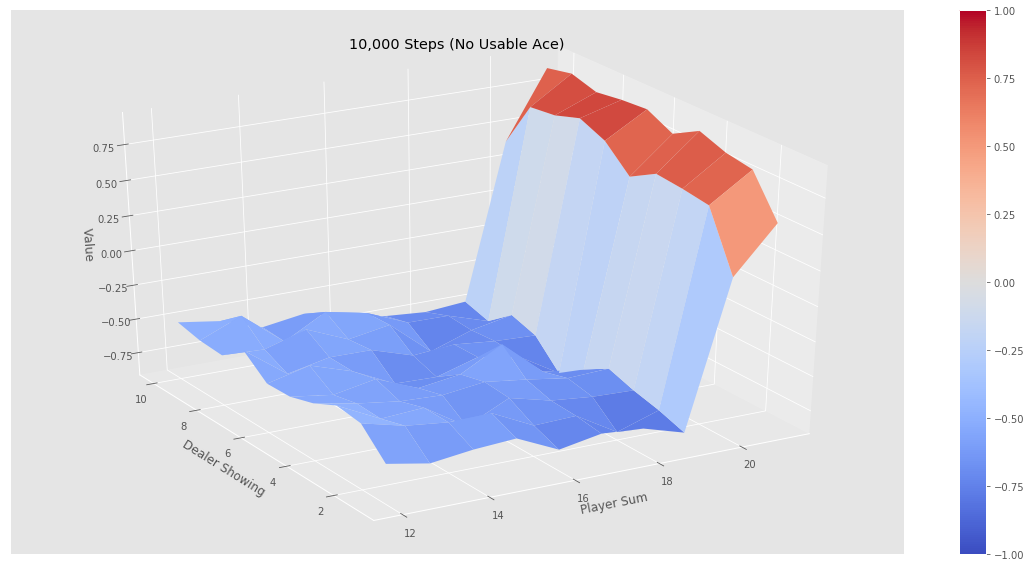

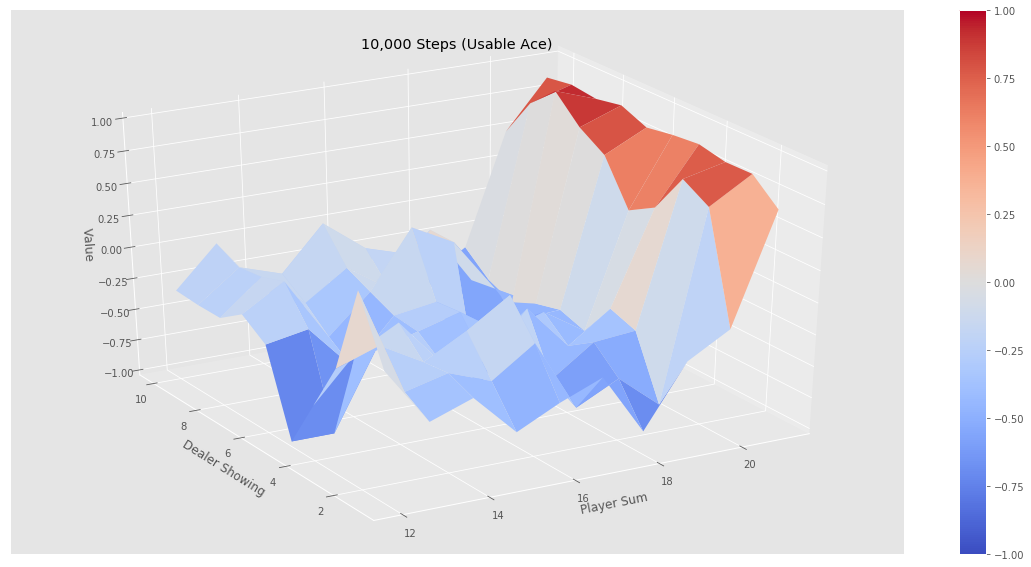

Episode 500000/500000.Wall time: 28.7 s


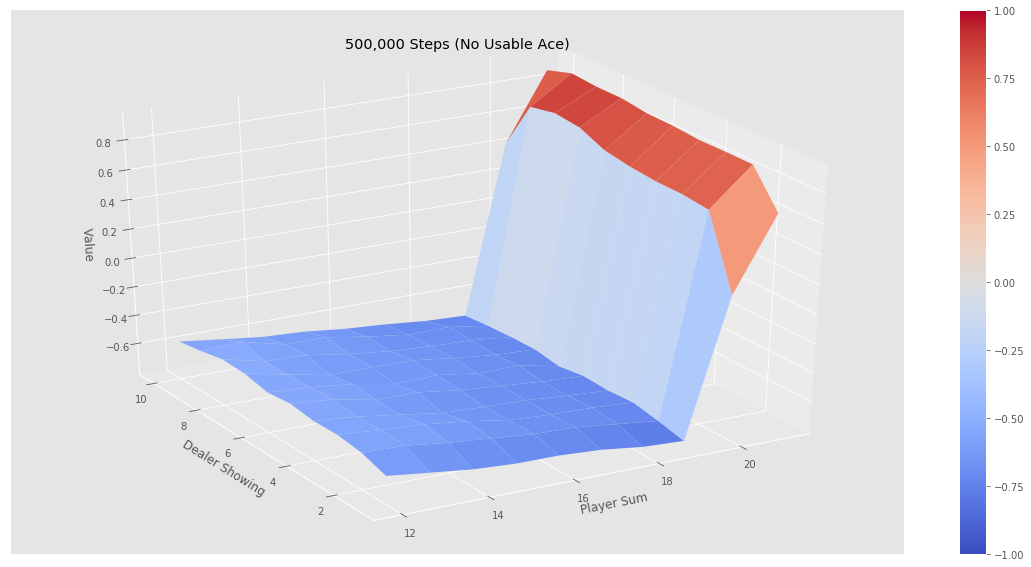

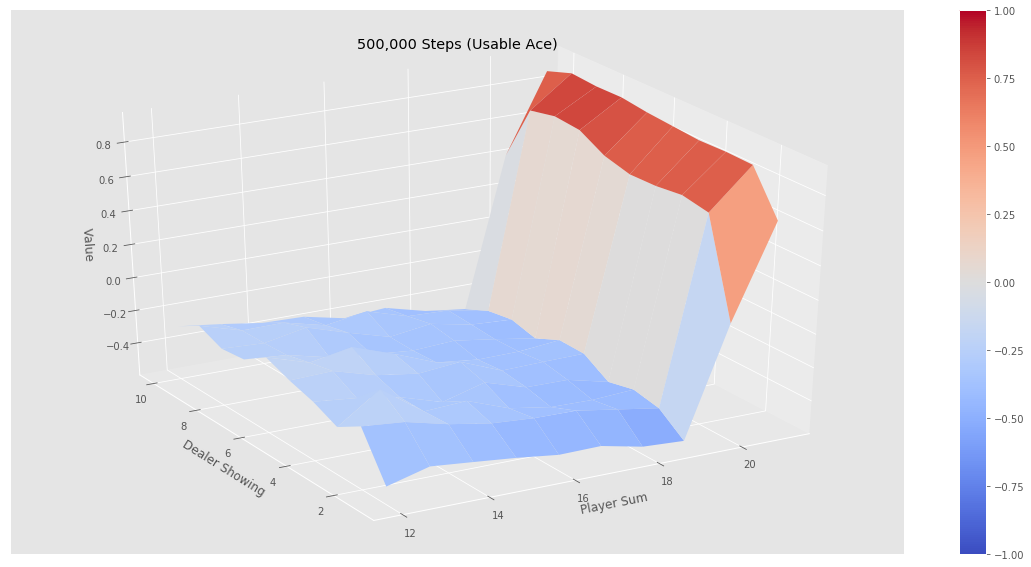

In [6]:
%time V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

%time V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

In [14]:
def mc_prediction_breakdown(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    print('V:',V,'returns_sum',returns_sum)
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        print('state_reset',state)
        print("------------------------------")
        print("------------------------------")
        for t in range(100):
            action = policy(state)
            print('t',t,'action',action)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            print('t',t,'episode',episode)
            if done:
                break
            state = next_state
            print('t',t,'state_after_previous action',state)
        
        
        print("------------------------------")
        print("------------------------------")
        # Find all states the we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        states_in_episode = set([tuple(x[0]) for x in episode])
        print('states_in_episode',states_in_episode)
        print('*******************************')
        for state in states_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            print('looping through state',state, 'first_occurence_idx',first_occurence_idx)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            print('looping through state',state, 'episode[first_occurence_idx:]',episode[first_occurence_idx:])
            print('looping through state',state, 'G',G)
            # Calculate average return for this state over all sampled episodes
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]
            print('returns_sum[state]',returns_sum[state],'returns_count[state]',returns_count[state],'V[state]',V[state])

    return V   

In [34]:
mc_prediction_breakdown(sample_policy, env, num_episodes=10)

V: defaultdict(<class 'float'>, {}) returns_sum defaultdict(<class 'float'>, {})
state_reset (15, 9, False)
------------------------------
------------------------------
t 0 action 1
t 0 episode [((15, 9, False), 1, -1)]
------------------------------
------------------------------
states_in_episode {(15, 9, False)}
*******************************
looping through state (15, 9, False) first_occurence_idx 0
looping through state (15, 9, False) episode[first_occurence_idx:] [((15, 9, False), 1, -1)]
looping through state (15, 9, False) G -1.0
returns_sum[state] -1.0 returns_count[state] 1.0 V[state] -1.0
state_reset (15, 8, False)
------------------------------
------------------------------
t 0 action 1
t 0 episode [((15, 8, False), 1, 0)]
t 0 state_after_previous action (18, 8, False)
t 1 action 1
t 1 episode [((15, 8, False), 1, 0), ((18, 8, False), 1, -1)]
------------------------------
------------------------------
states_in_episode {(18, 8, False), (15, 8, False)}
*****************

defaultdict(float,
            {(12, 3, False): -1.0,
             (12, 3, True): -1.0,
             (12, 10, False): 1.0,
             (13, 5, False): -1.0,
             (14, 1, False): -1.0,
             (14, 1, True): -1.0,
             (15, 8, False): -1.0,
             (15, 9, False): -1.0,
             (15, 10, False): -1.0,
             (16, 5, False): -1.0,
             (16, 8, False): -1.0,
             (17, 1, False): -1.0,
             (18, 3, False): -1.0,
             (18, 8, False): -1.0,
             (19, 5, False): -1.0,
             (19, 7, False): -1.0,
             (19, 8, False): -1.0,
             (21, 10, False): 1.0})

In [32]:
V_10k

defaultdict(float,
            {(12, 1, False): -0.6237623762376238,
             (12, 1, True): 0.0,
             (12, 2, False): -0.43956043956043955,
             (12, 2, True): 0.5,
             (12, 3, False): -0.41509433962264153,
             (12, 3, True): -0.2,
             (12, 4, False): -0.5,
             (12, 4, True): -0.6,
             (12, 5, False): -0.5531914893617021,
             (12, 5, True): -1.0,
             (12, 6, False): -0.5584415584415584,
             (12, 6, True): -0.3333333333333333,
             (12, 7, False): -0.4157303370786517,
             (12, 7, True): -0.2,
             (12, 8, False): -0.5480769230769231,
             (12, 8, True): -0.3333333333333333,
             (12, 9, False): -0.5360824742268041,
             (12, 9, True): -0.3333333333333333,
             (12, 10, False): -0.4975609756097561,
             (12, 10, True): -0.32,
             (13, 1, False): -0.6813186813186813,
             (13, 1, True): -0.45454545454545453,
        